# Model visualization

**Import** model from "model/v01"

In [1]:
# Setup

import numpy as np
import pandas as pd
import seaborn as sns

from pkg import utils
from pkg import plot

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans


In [2]:
# Configurations

run_save = True

n_clusters = 3   # None to do not run
plot_pca = True
plot_tsne = False

seed = 123

In [3]:
# Importing data

parent = 'data'
filename = 'cleaned.csv'

path = utils.get_path(parent,filename)
df = pd.read_csv(path)


parent = 'data'
filename = 'amino.csv'

path = utils.get_path(parent,filename)
amino_df = pd.read_csv(path)

In [4]:
numericals = df.select_dtypes(include=['number'])
numericals = numericals.columns

categoricals = df.select_dtypes(exclude=['number'])
categoricals = categoricals.columns

codons = numericals[4:]

print(codons)

Index(['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC',
       'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG',
       'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU',
       'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU',
       'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA',
       'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA',
       'GAG', 'UAA', 'UAG', 'UGA'],
      dtype='object')


figure saved on  c:\Users\ptons\Code\repositories\codons\reports\3d_pca_cluster


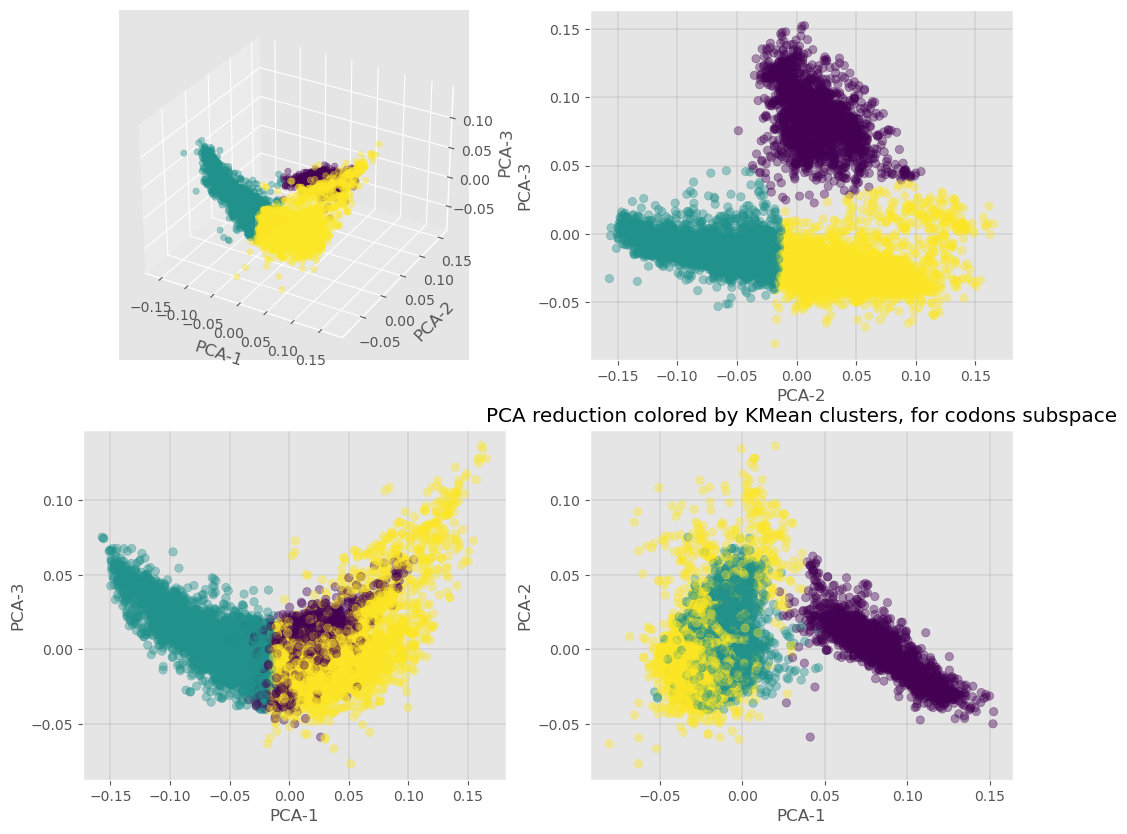

In [5]:

if n_clusters:

    X_train, X_test = train_test_split(df[codons], test_size=0.2, random_state=seed)

    X_train_norm = preprocessing.normalize(X_train)
    X_test_norm = preprocessing.normalize(X_test)

    kmeans = KMeans(n_clusters=n_clusters, random_state=seed, n_init='auto')
    kmeans.fit(X_train_norm)

    if plot_pca:
        name = '3d_pca_cluster' if run_save else None
        plot.pca_3d(X_train, hue=kmeans.labels_, title="PCA reduction colored by KMean clusters, for codons subspace" , multiple_graph=True, savename=name)

    if plot_tsne:
        name = 't_sne_cluster' if run_save else None
        plot.t_sne(X_train, hue=kmeans.labels_, title="t-SNE reduction colored by KMean clusters, for codons", savename=name)

figure saved on  c:\Users\ptons\Code\repositories\codons\reports\3d_pca-codons


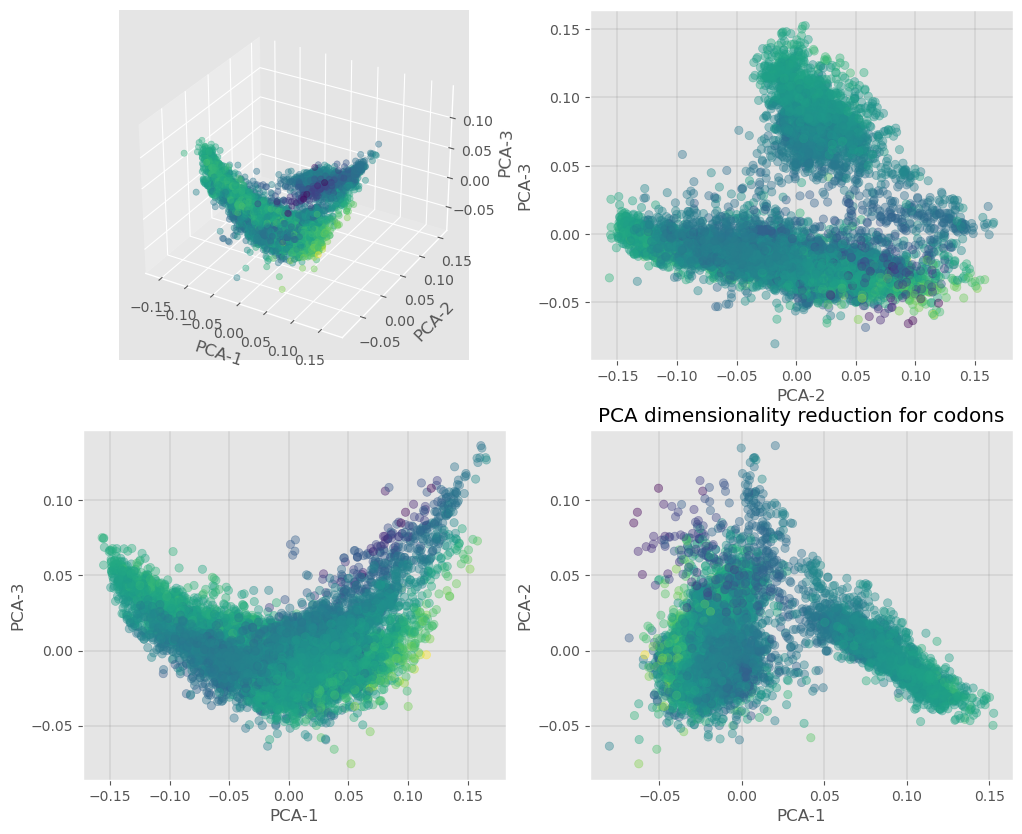

In [6]:
if plot_pca:
    name = '3d_pca-codons' if run_save else None
    plot.pca_3d(df[codons], title="PCA dimensionality reduction for codons" , multiple_graph=True, savename=name)

#if plot_tsne:
#    name = 't_sne-codons' if run_save else None
#    plot.t_sne(df[codons], title="t-SNE dimensionality reduction for codons", savename=name)

In [7]:
kmeans.labels_

array([1, 0, 2, ..., 1, 0, 2])